### BHARAT INTERN

### NAME=ABHYANK RAWAT

### TASK1=ADANI STOCK PRICE PREDICTION

### IMPORT LIBRARIES

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

In [86]:
df=pd.read_csv(r"C:\Users\akshu\AppData\Local\Temp\Temp1_archive (2).zip\adani.csv")

In [87]:
df

,timestamp,symbol,company,open,high,low,close,volume,dividends,stock_splits
0,1025461800000000000,ACC,ACC Limited,107.789,109.810,107.115,108.968,659631,0.0,0.0
1,1025461800000000000,AMBUJACEM,Ambuja Cements Limited,17.278,17.660,17.202,17.573,630442,0.0,0.0
2,1025461800000000000,ADANIENT,Adani Enterprises Limited,-0.010,-0.011,-0.010,-0.010,1080397,0.0,0.0
3,1025548200000000000,ACC,ACC Limited,108.496,110.046,107.789,108.059,282660,0.0,0.0
4,1025548200000000000,AMBUJACEM,Ambuja Cements Limited,17.573,17.748,17.409,17.560,1007265,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
31492,1677090600000000000,AMBUJACEM,Ambuja Cements Limited,336.000,343.850,331.350,336.900,10662112,0.0,0.0
31493,1677090600000000000,ADANIPORTS,Adani Ports and Special Economic Zone Limited,539.500,558.150,533.650,551.850,10709730,0.0,0.0
31494,1677090600000000000,ADANIENT,Adani Enterprises Limited,1380.000,1438.000,1350.000,1382.650,8904676,0.0,0.0
31495,1677090600000000000,ATGL,Adani Total Gas Limited,791.350,791.350,791.350,791.350,51867,0.0,0.0


In [88]:
df.shape

(31497, 10)

In [89]:
df.describe()

,timestamp,open,high,low,close,volume,dividends,stock_splits
count,3.149700e+04,31497.000000,31497.000000,31497.000000,31497.000000,3.149700e+04,31497.000000,31497.000000
mean,1.409762e+18,404.542261,411.745505,396.689603,404.171407,3.594056e+06,0.017824,0.000381
std,1.817938e+17,623.108375,633.783423,610.711441,622.359535,7.932287e+06,0.530637,0.041405
min,1.025462e+18,-0.011000,-0.011000,-0.011000,-0.011000,0.000000e+00,0.000000,0.000000
25%,1.267036e+18,59.423000,60.773000,58.000000,59.238000,3.934800e+05,0.000000,0.000000
50%,1.434911e+18,140.100000,143.201000,137.100000,139.993000,1.347016e+06,0.000000,0.000000
75%,1.569868e+18,384.277000,392.376000,377.043000,384.034000,3.874840e+06,0.000000,0.000000
max,1.677091e+18,4175.000000,4236.750000,4066.400000,4165.300000,2.421999e+08,58.000000,5.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31497 entries, 0 to 31496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     31497 non-null  int64  
 1   symbol        31497 non-null  object 
 2   company       31497 non-null  object 
 3   open          31497 non-null  float64
 4   high          31497 non-null  float64
 5   low           31497 non-null  float64
 6   close         31497 non-null  float64
 7   volume        31497 non-null  int64  
 8   dividends     31497 non-null  float64
 9   stock_splits  31497 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 2.4+ MB


In [91]:
df.isnull().mean()*100

timestamp       0.0
symbol          0.0
company         0.0
open            0.0
high            0.0
low             0.0
close           0.0
volume          0.0
dividends       0.0
stock_splits    0.0
dtype: float64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31497 entries, 0 to 31496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     31497 non-null  int64  
 1   symbol        31497 non-null  object 
 2   company       31497 non-null  object 
 3   open          31497 non-null  float64
 4   high          31497 non-null  float64
 5   low           31497 non-null  float64
 6   close         31497 non-null  float64
 7   volume        31497 non-null  int64  
 8   dividends     31497 non-null  float64
 9   stock_splits  31497 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 2.4+ MB


In [93]:
df.duplicated().sum()

0

### Histogram

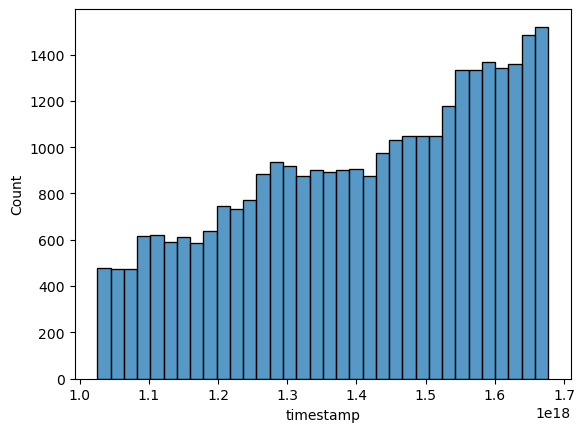

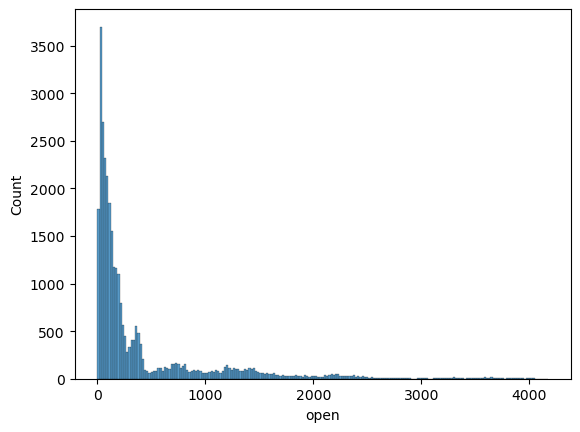

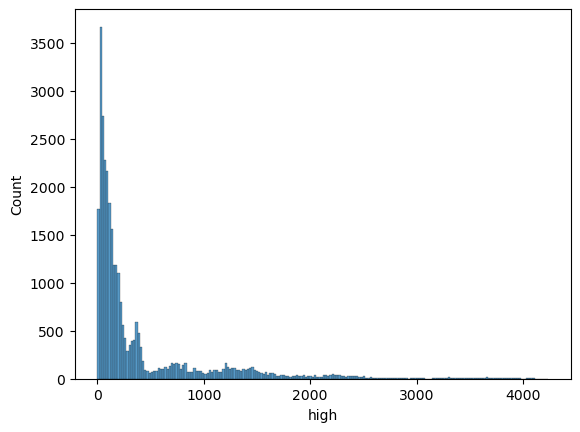

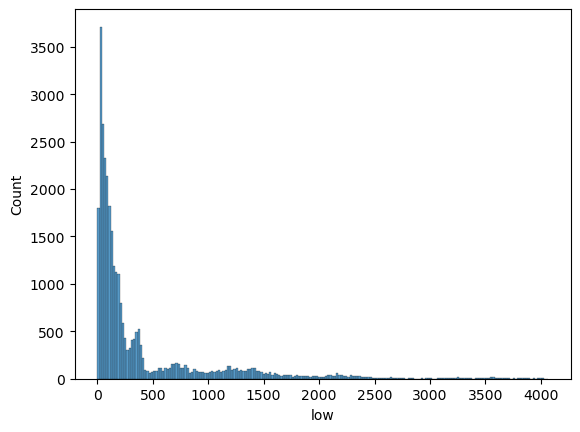

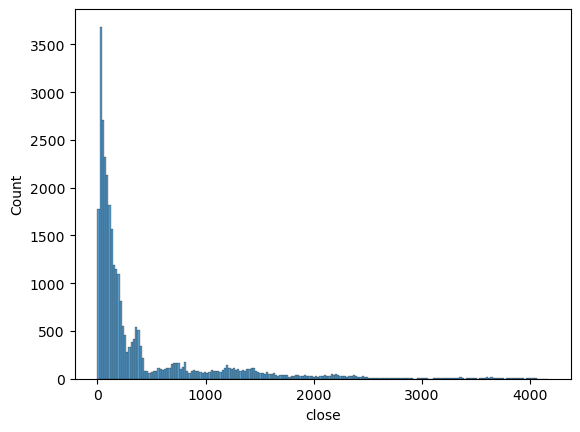

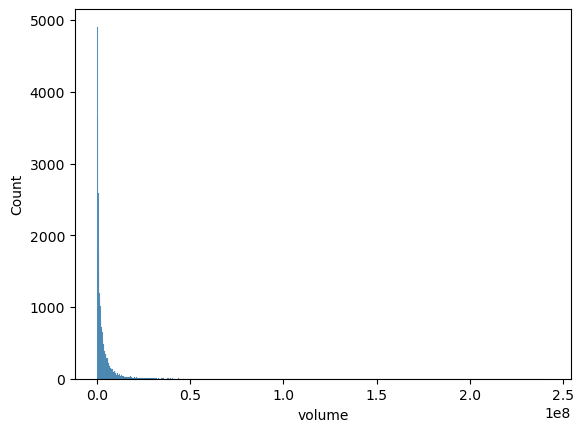

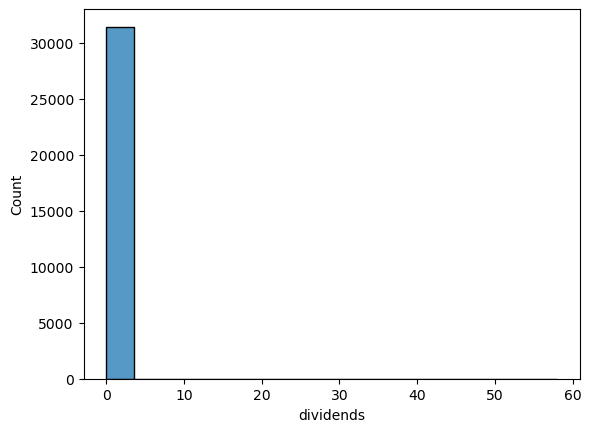

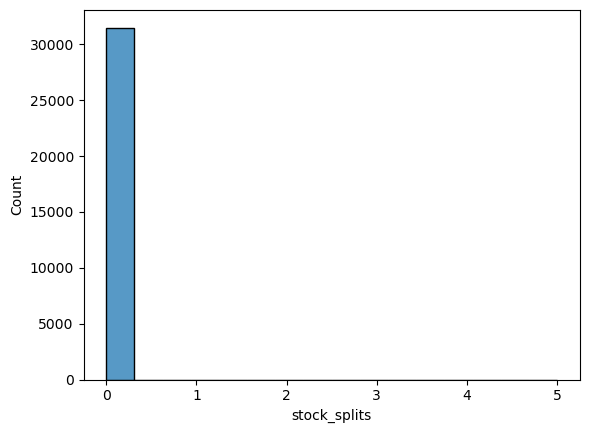

In [100]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i])
        plt.show();

### kde plot

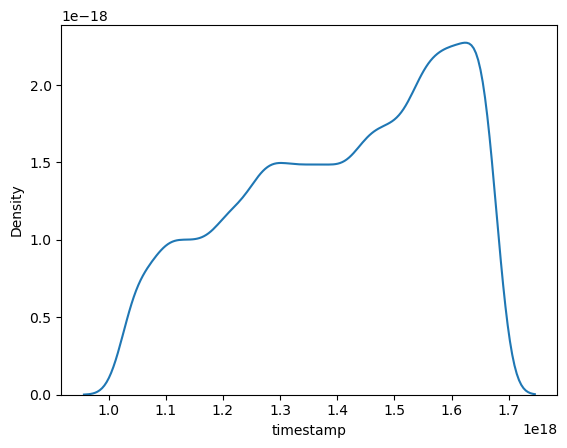

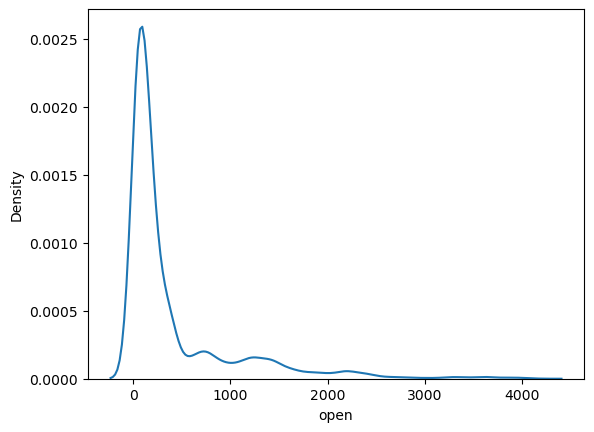

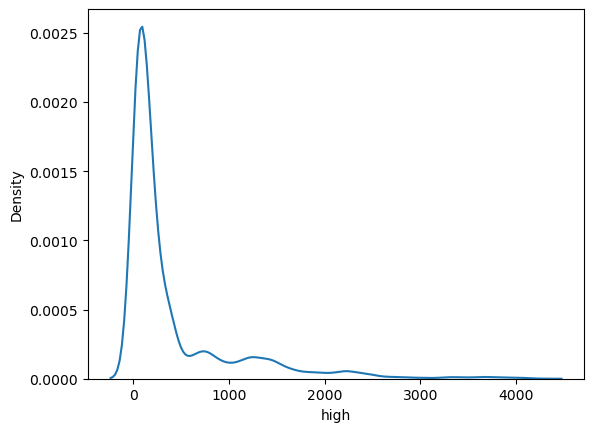

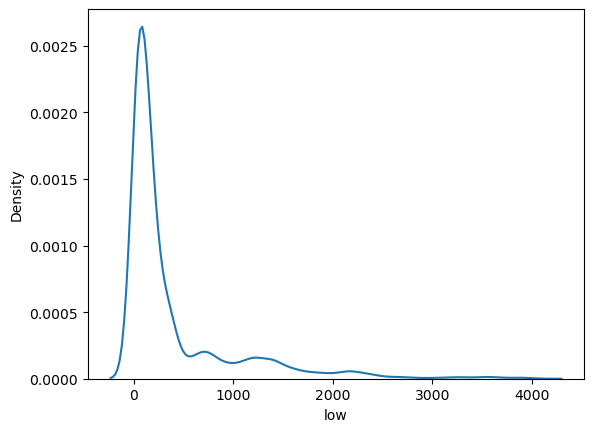

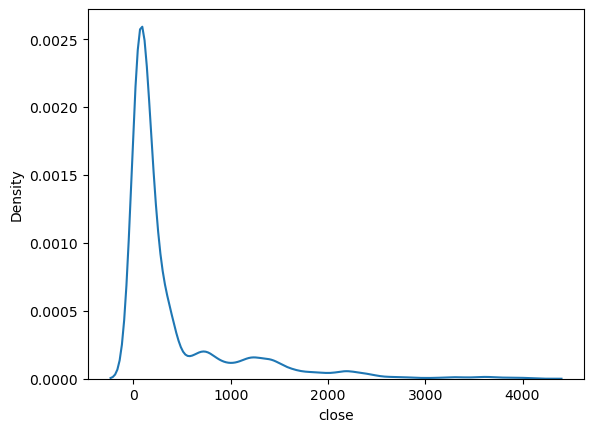

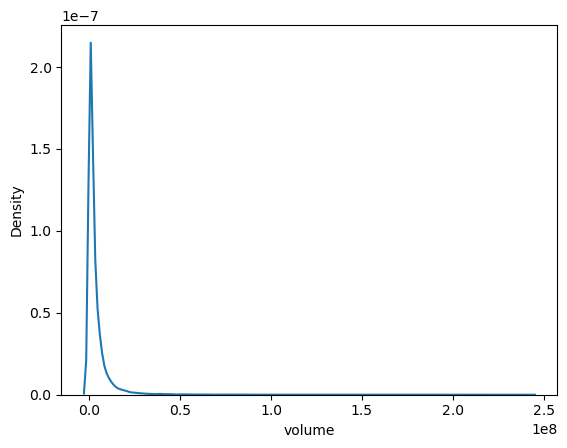

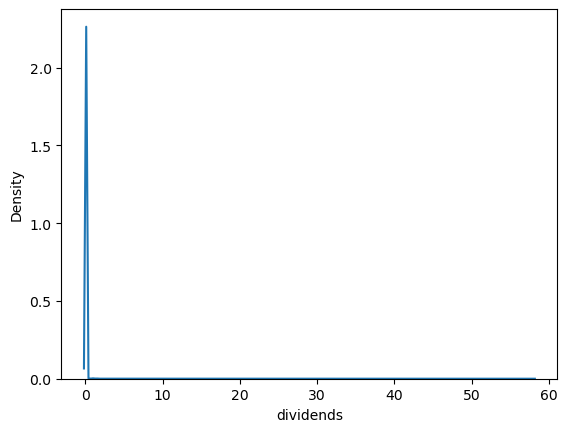

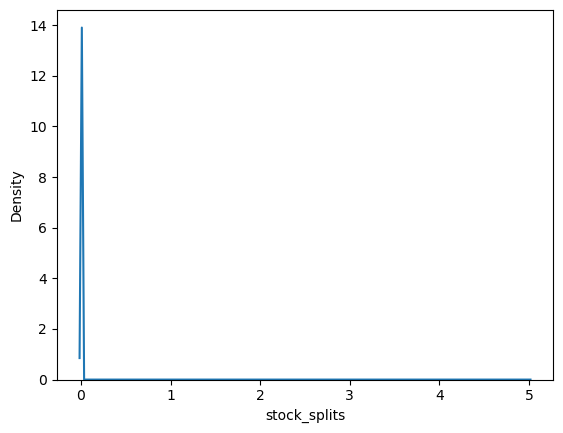

In [101]:
for i in df.columns:
    if df [i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();
        
        

### boxplot

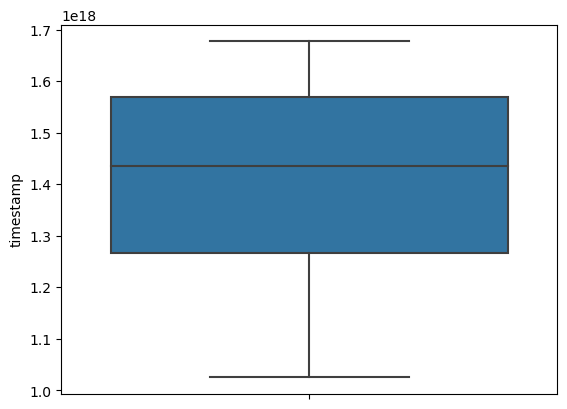

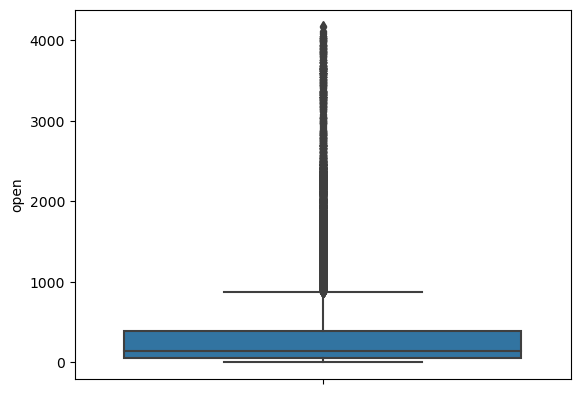

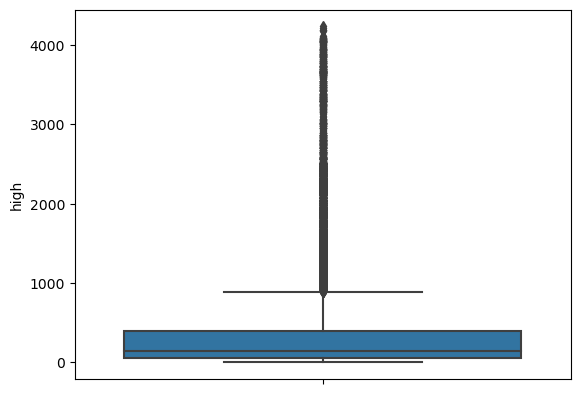

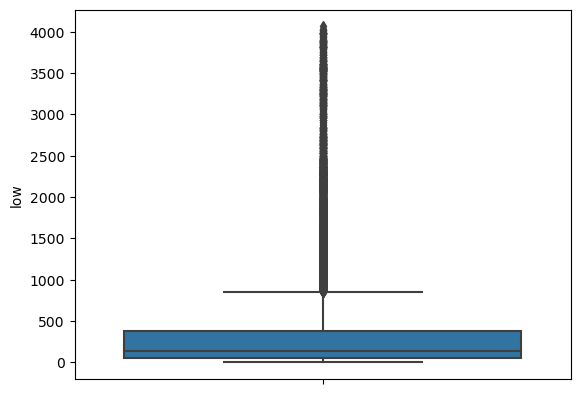

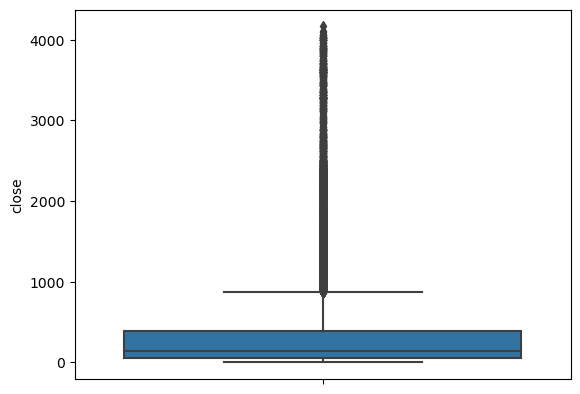

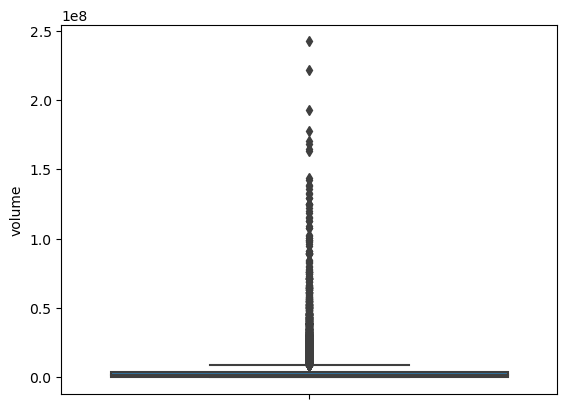

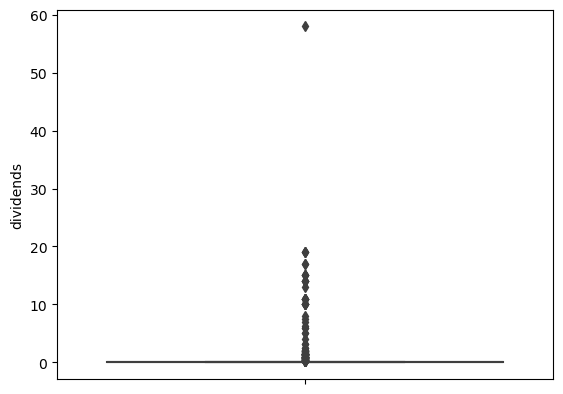

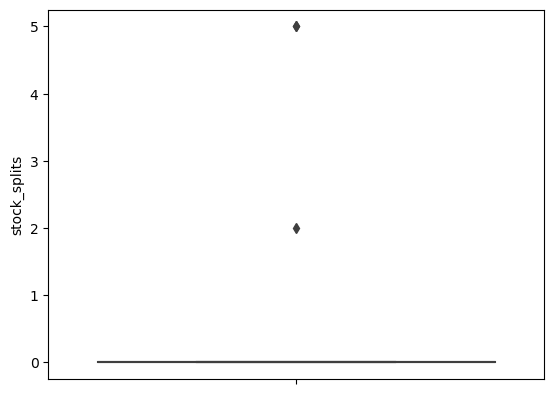

In [102]:
for i in df.columns:
    if df [i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show()

### multivariate analysis

### bar plots

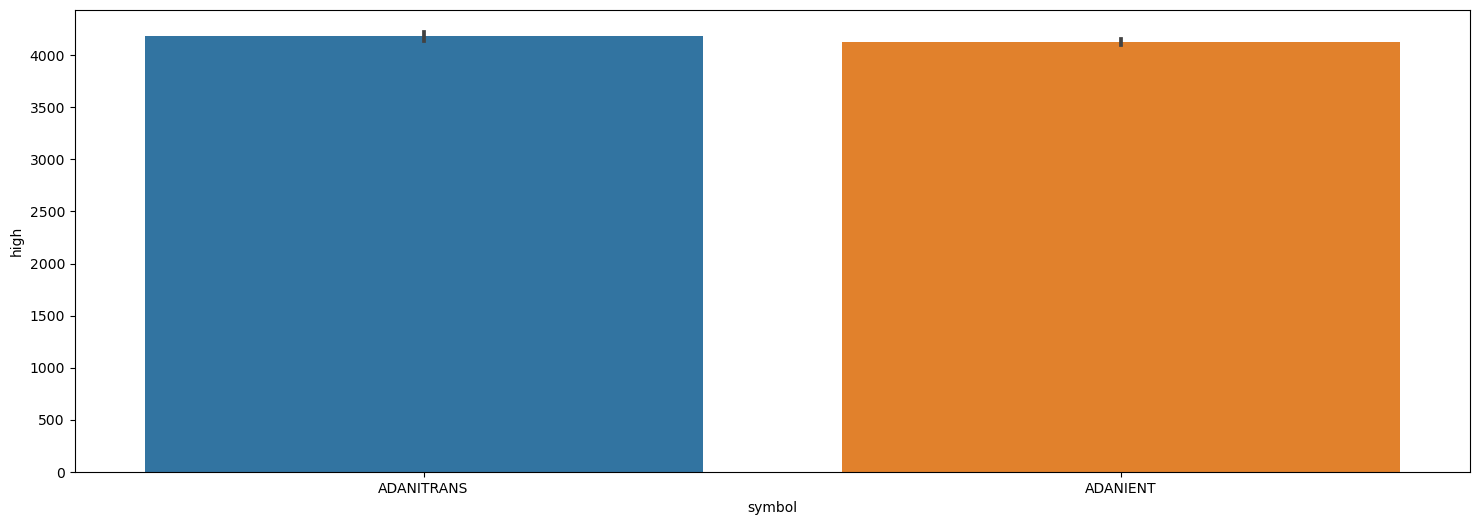

In [103]:
plt.figure(figsize=(18,6))
sns.barplot(x='symbol' ,y='high',data=df.sort_values(by='high',ascending=False)[:10]);

''

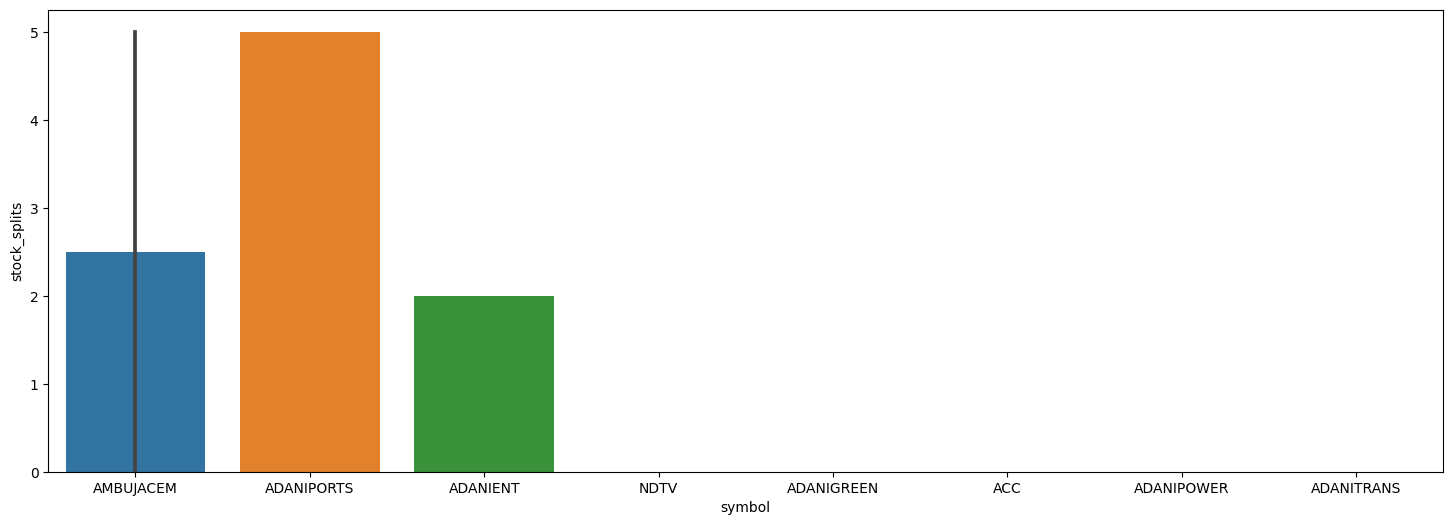

In [104]:
plt.figure(figsize=(18,6))
sns.barplot(x='symbol',y='stock_splits',data=df.sort_values(by='stock_splits',ascending=False)[:10])
;


### subplots

timestamp          AxesSubplot(0.125,0.11;0.0824468x0.77)
open            AxesSubplot(0.223936,0.11;0.0824468x0.77)
high            AxesSubplot(0.322872,0.11;0.0824468x0.77)
low             AxesSubplot(0.421809,0.11;0.0824468x0.77)
close           AxesSubplot(0.520745,0.11;0.0824468x0.77)
volume          AxesSubplot(0.619681,0.11;0.0824468x0.77)
dividends       AxesSubplot(0.718617,0.11;0.0824468x0.77)
stock_splits    AxesSubplot(0.817553,0.11;0.0824468x0.77)
dtype: object

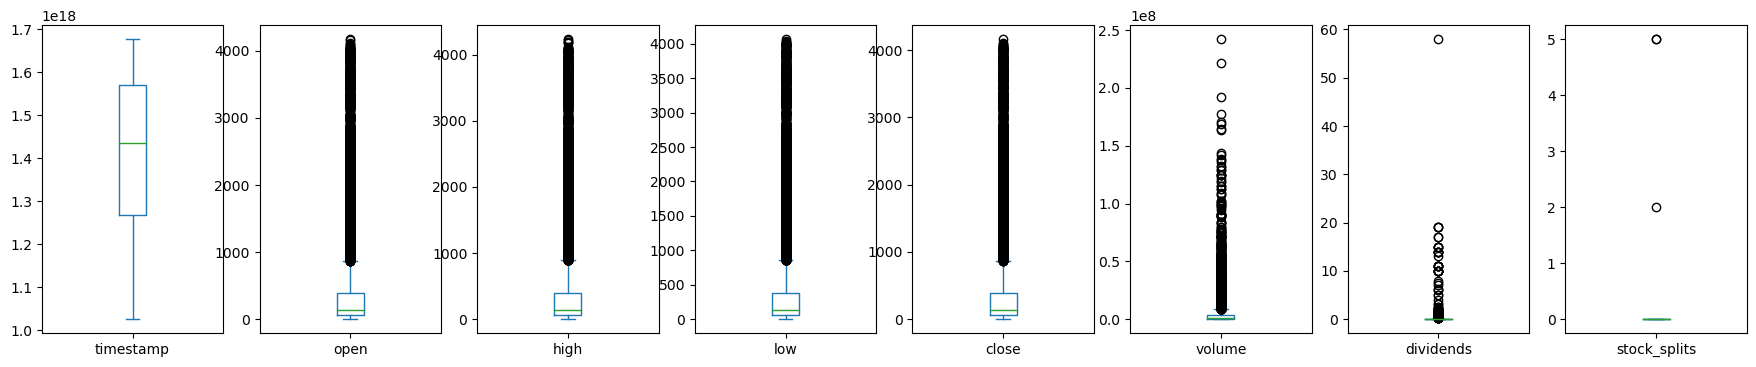

In [105]:
df.plot.box(figsize=(22,4),subplots=True)




### pairplot

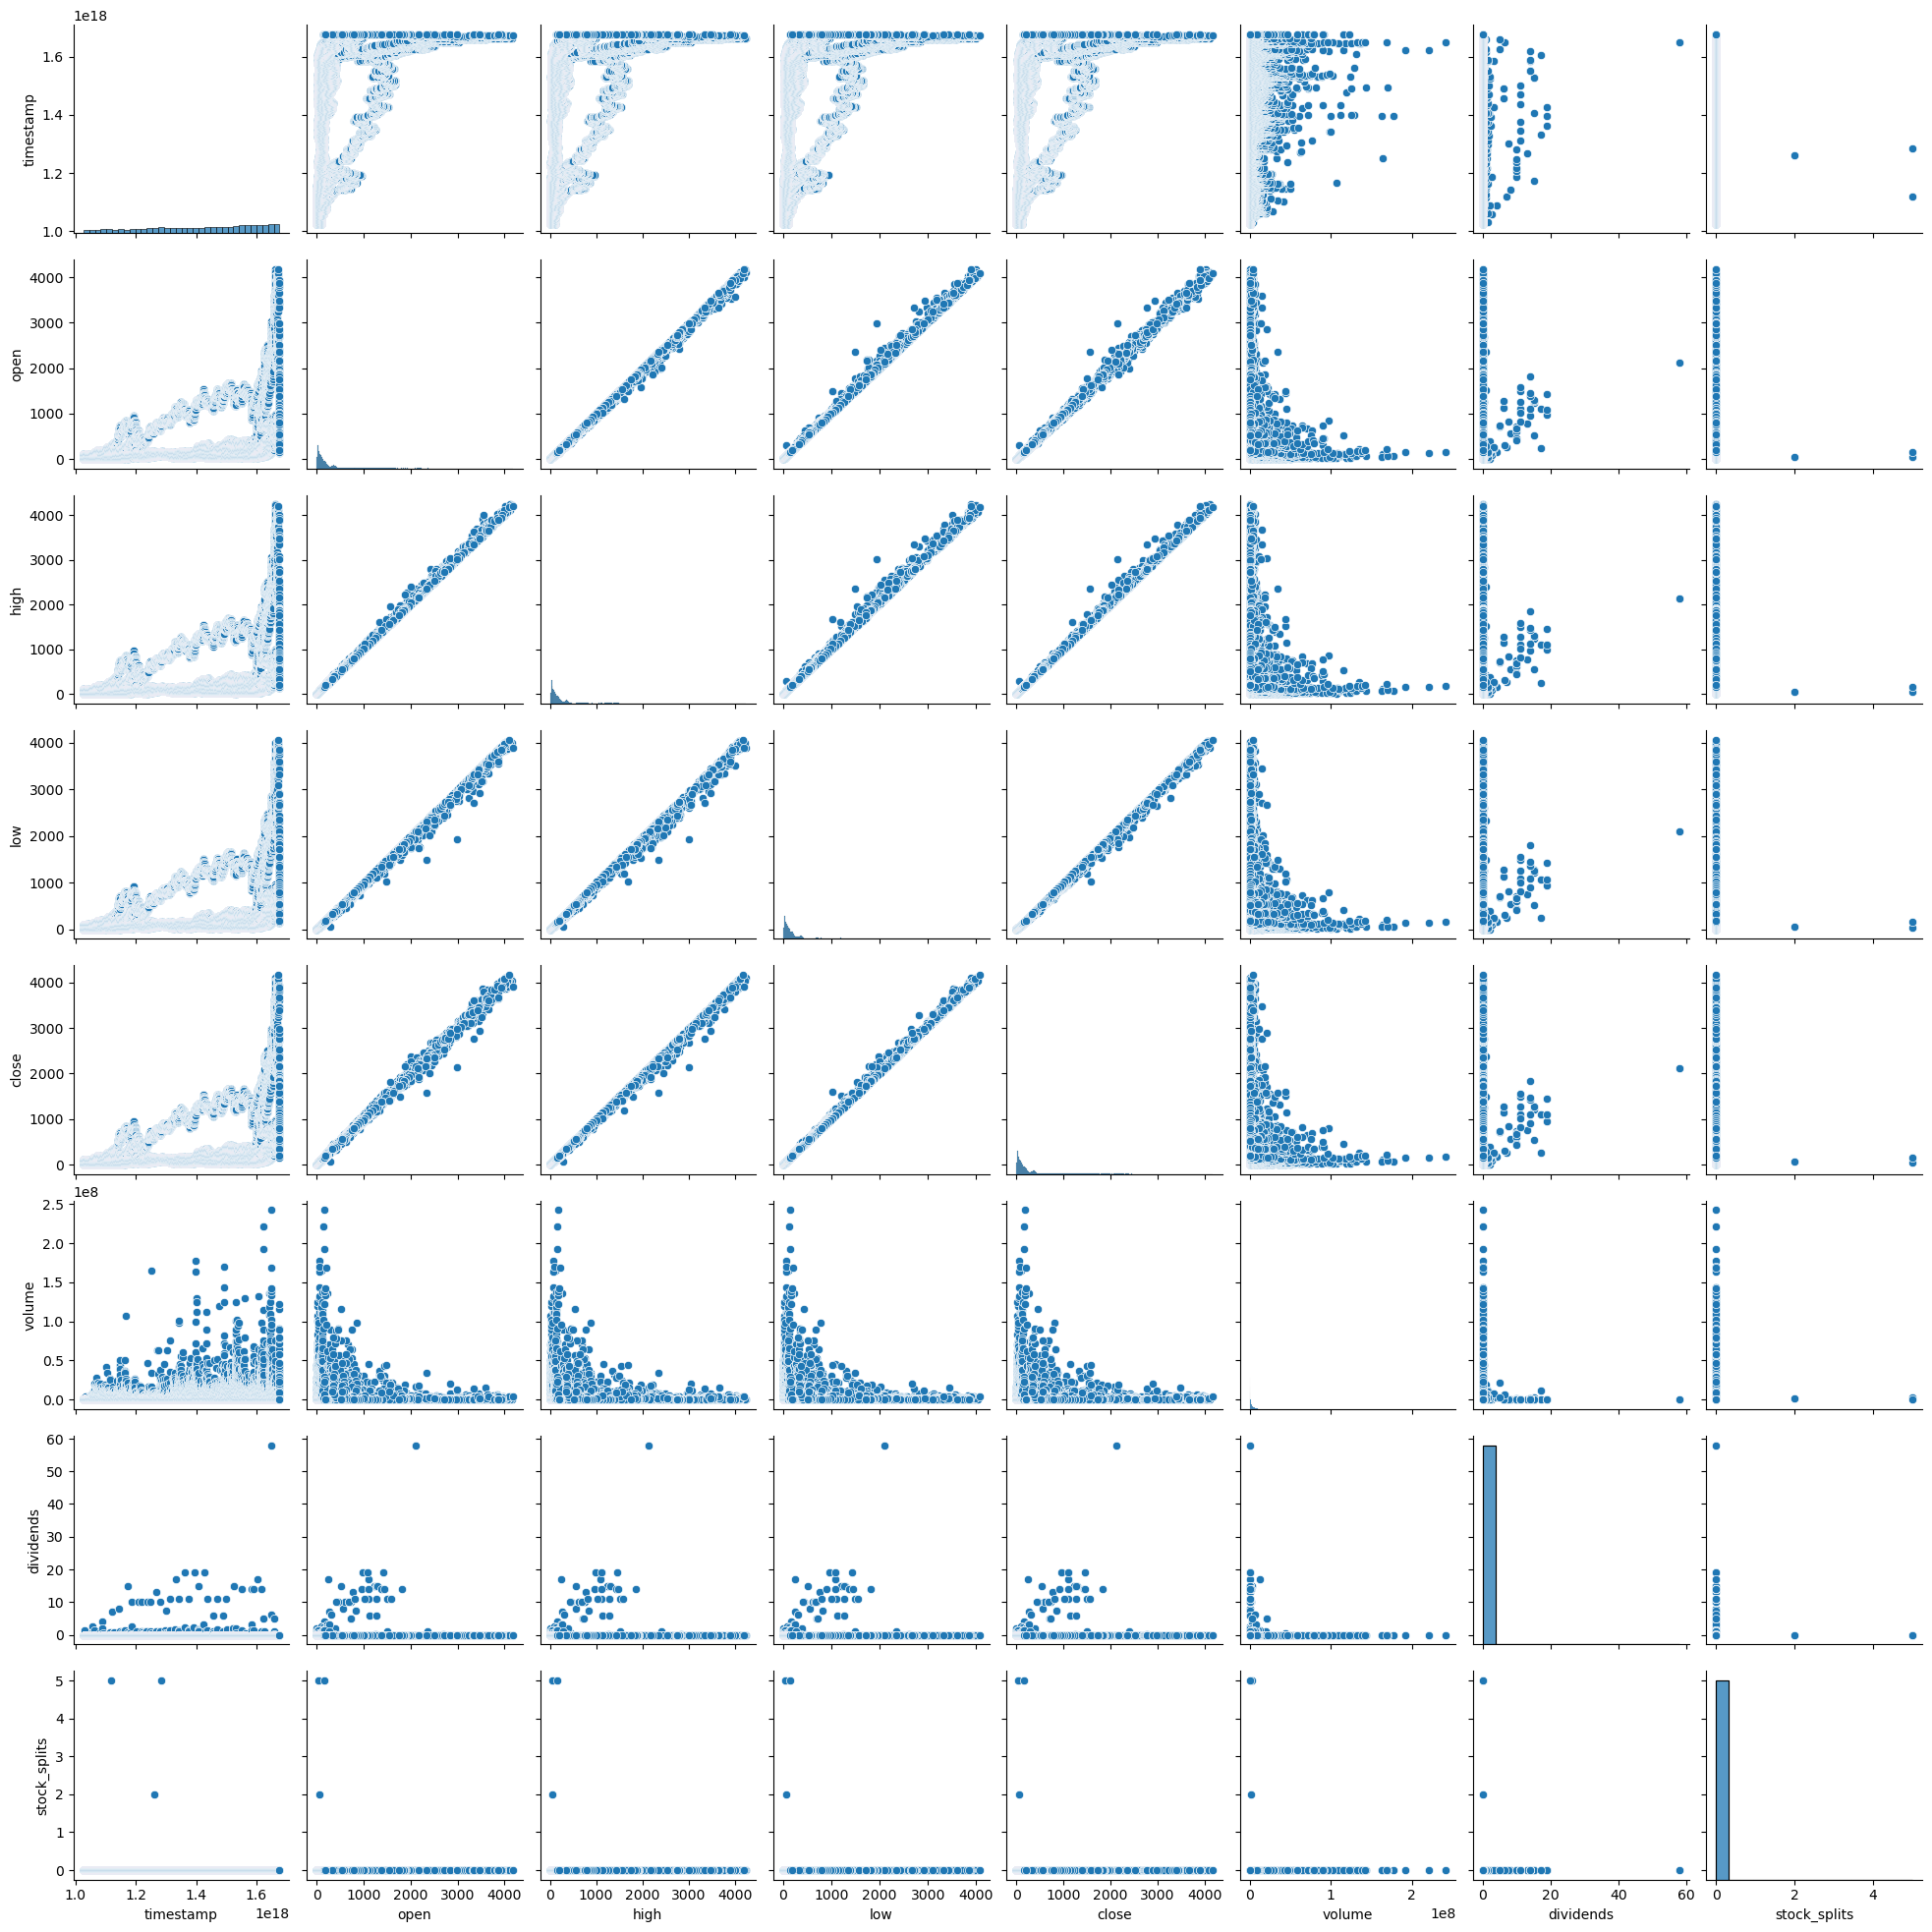

In [106]:
sns.pairplot(data=df)
plt.show();

### outlier treatment

In [107]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [108]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

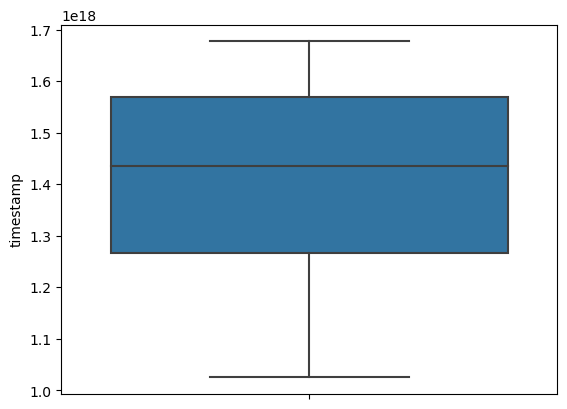

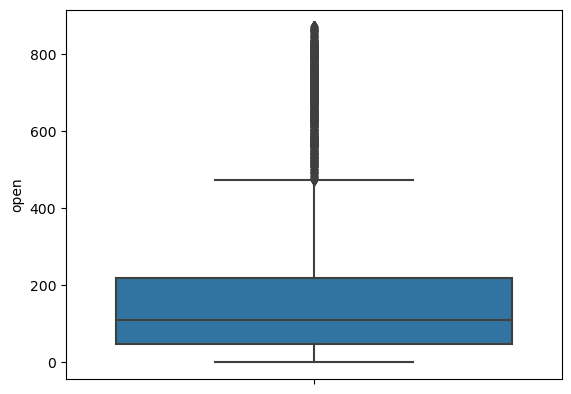

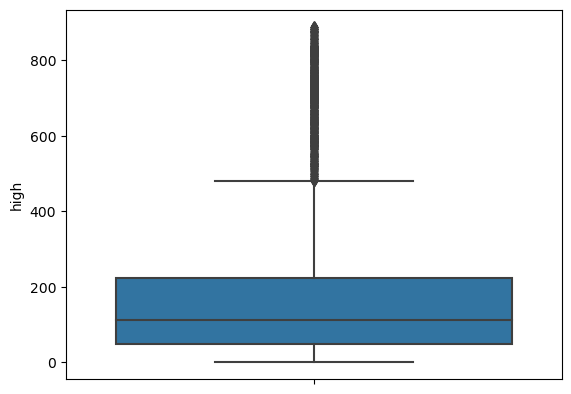

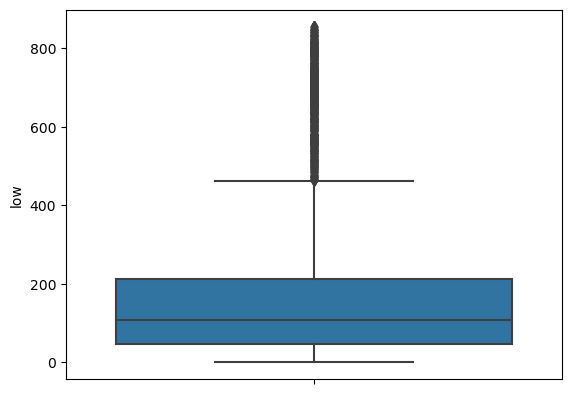

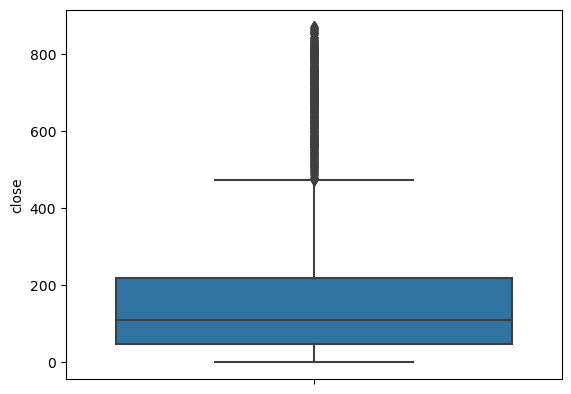

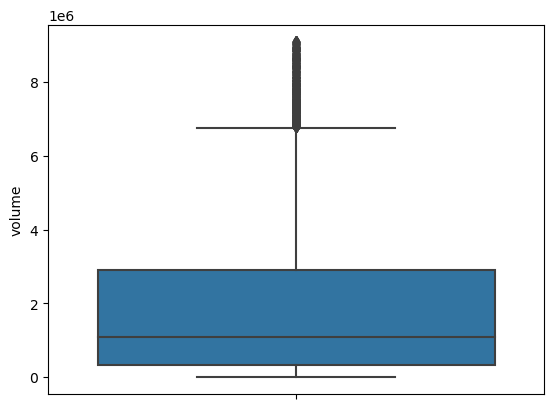

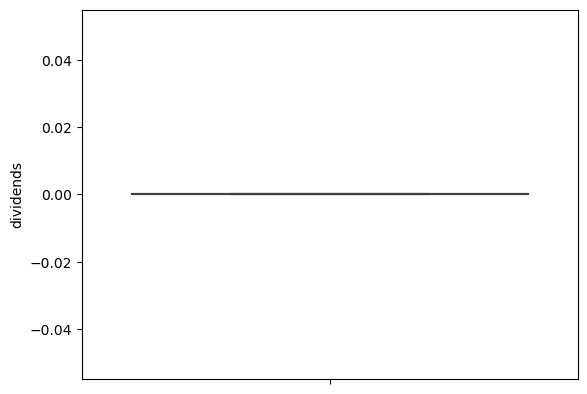

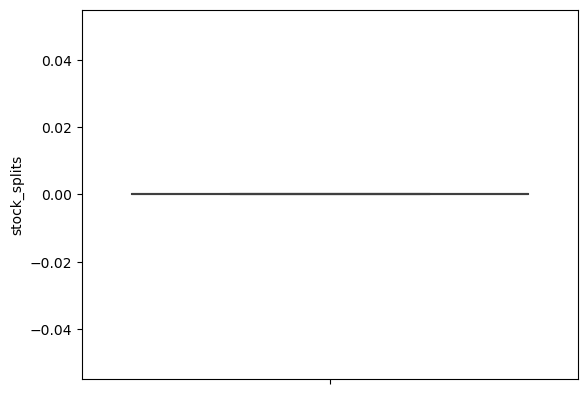

In [109]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

### label encoding/

In [110]:
cols=['timestamp','open','low','close','volume','dividends','stock_splits']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)

### Checking correlation using heatmap

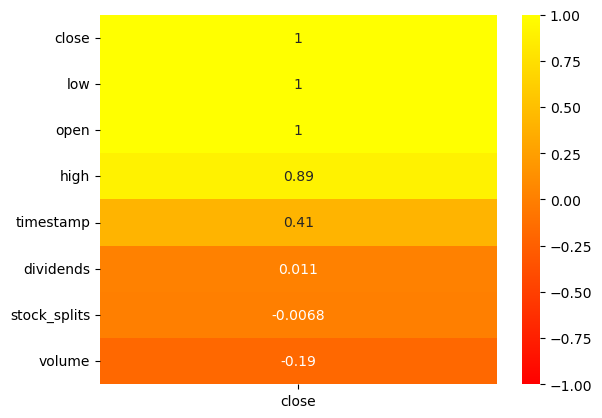

In [111]:
sns.heatmap(df.corr()[['close']].sort_values(by='close',ascending=False),vmin=-1,annot=True,cmap="autumn");

### selecting x &y

In [112]:
x=df[['open','close','low','timestamp','stock_splits','volume']].values

In [113]:
y=df[['close']].values

### Scaling

In [114]:
sc=StandardScaler()

In [115]:
x=sc.fit_transform(x)

### Cross Validation

In [126]:
models={'LinearRegression':LinearRegression(),'Ridge':Ridge(),
        'LinearSVR':LinearSVR(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'AdaboostRegressor':AdaBoostRegressor(),
        'RandomForestRegressor':RandomForestRegressor()}

In [127]:
for name,model in models.items():
    scores=cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print('AVERAGE RMSE:',rmse_average)
    print("*"*100)

cross validation model:LinearRegression
AVERAGE RMSE: 8.833207949685685e-11
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 10.718650970547559
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 86.36226215717832
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 10.929861131604522
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 43.51327467492267
****************************************************************************************************
cross validation model:AdaboostRegressor
AVERAGE RMSE: 466.80728785402806
***********************************************************

### model building using linear regression 

In [128]:
model=LinearRegression()

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [130]:
model.fit(x_train,y_train)

LinearRegression()

In [131]:
y_pred=model.predict(x)

### predicting y

In [132]:
OUTPUT =pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,7407.0,7407.0
1,984.0,984.0
2,1.0,1.0
3,7349.0,7349.0
4,981.0,981.0


### scatterplot

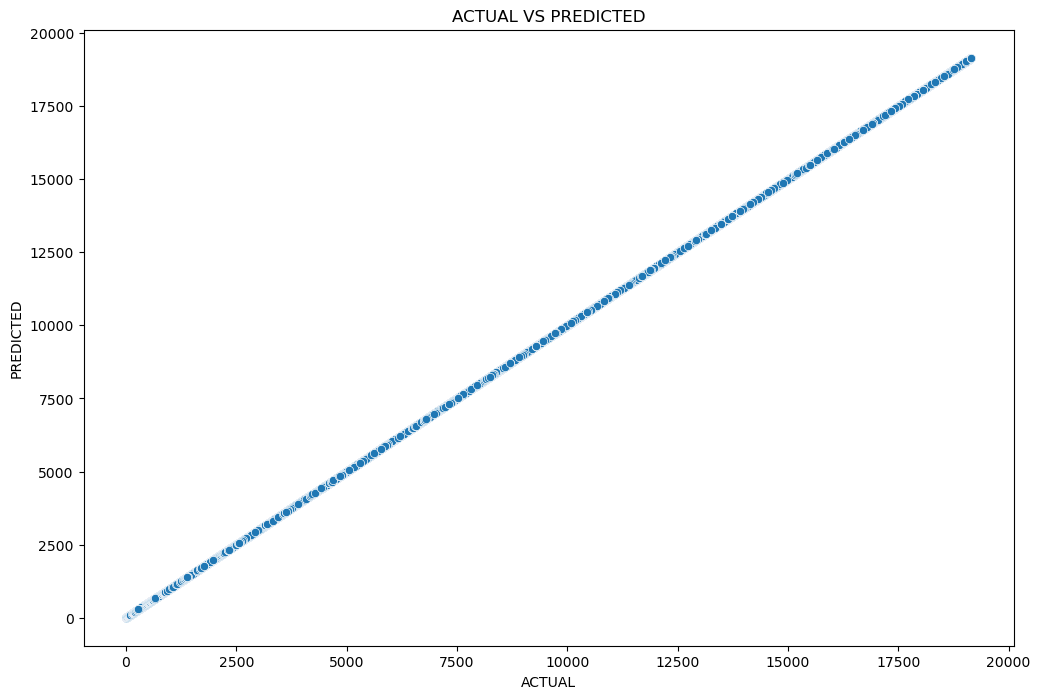

In [136]:
plt.figure(figsize=(12,8))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");

### SCORE

In [137]:
model.score(x,y)*100

100.0